In [7]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))

import matplotlib.pyplot as plt
import pandas as pd
from etl.queries import Queries

In [12]:
queries = Queries("citibike", "trips")

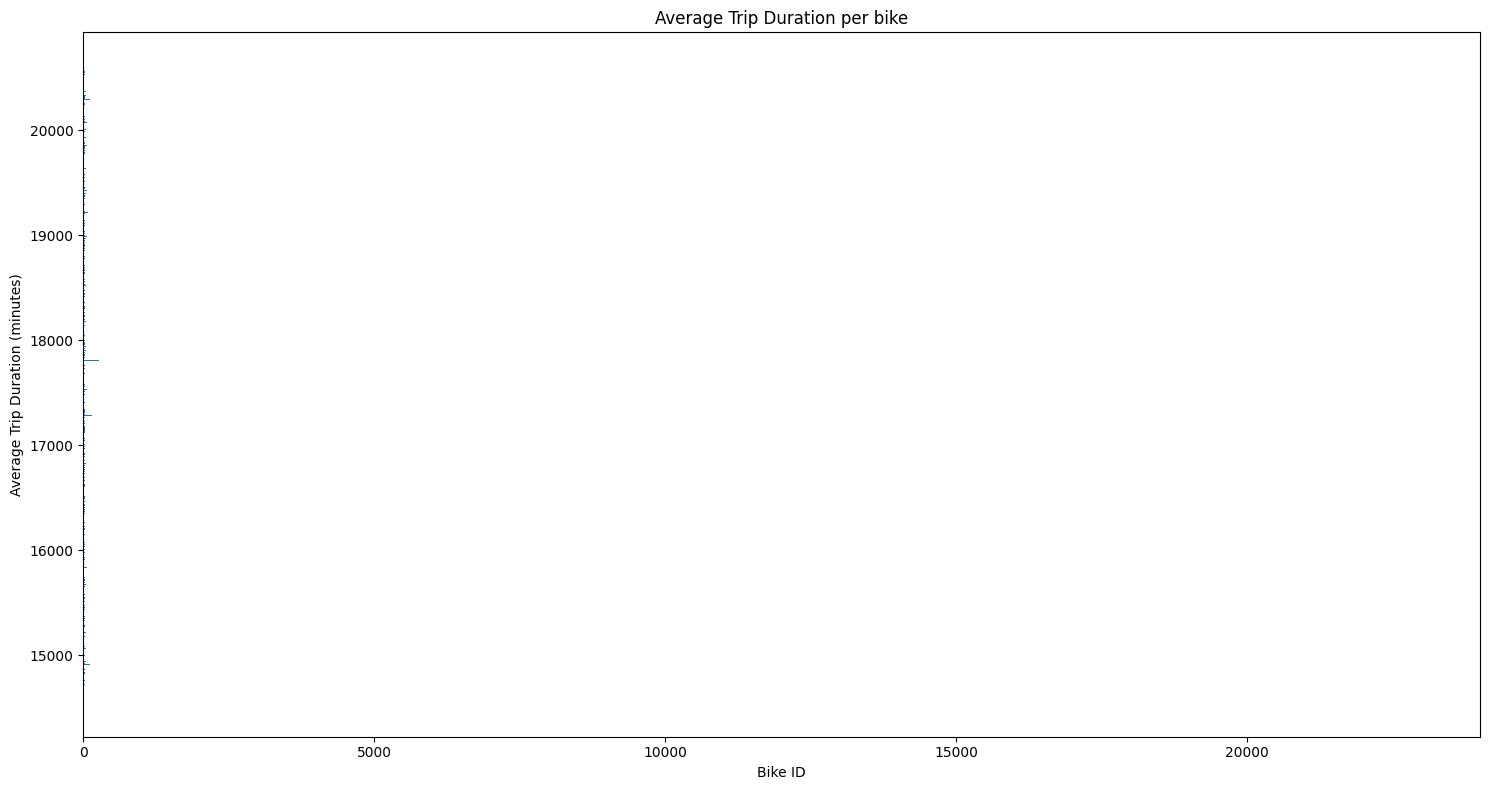

In [29]:
# average_trip_duration
trip_data = queries.get_average_trip_duration_by_bike()
bike_id = []
avg_trip_duration = []
for trip in trip_data:
    bike_id.append(trip['_id'])
    duration = trip['avg_duration']/60000
    avg_trip_duration.append(duration)

plt.figure(figsize=(15,8))
bar_width = 0.8
plt.barh(bike_id, avg_trip_duration)
plt.title("Average Trip Duration per bike")
plt.xlabel("Bike ID")
plt.ylabel("Average Trip Duration (minutes)")

plt.tight_layout()
plt.show()

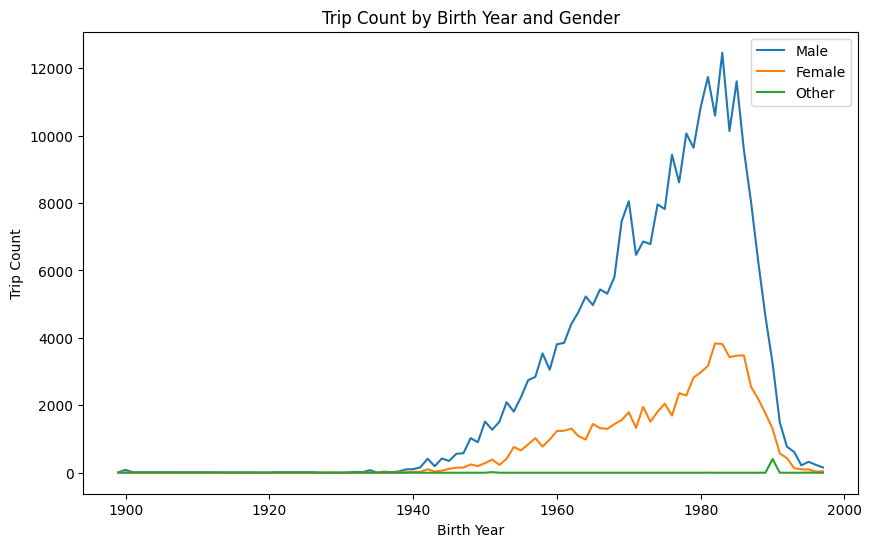

In [13]:

aggregated_data = queries.aggregate_by_birth_year_and_gender()
birth_years = []
male_counts = []
female_counts = []
other_counts = []

for record in aggregated_data:
    birth_year = record['_id']['birth_year']
    gender = record['_id']['gender']
    count = record['tripCount']
    
    if birth_year not in birth_years:
        birth_years.append(birth_year)
        male_counts.append(0)
        female_counts.append(0)
        other_counts.append(0)
    
    index = birth_years.index(birth_year)
    if gender == 1:
        male_counts[index] = count
    elif gender == 2:
        female_counts[index] = count
    else:
        other_counts[index] = count

# Step 3: Plotting with Matplotlib
plt.figure(figsize=(10, 6))

plt.plot(birth_years, male_counts, label='Male')
plt.plot(birth_years, female_counts, label='Female')
plt.plot(birth_years, other_counts, label='Other')

plt.xlabel('Birth Year')
plt.ylabel('Trip Count')
plt.title('Trip Count by Birth Year and Gender')
plt.legend()

plt.show()